# Lyft Bay Wheels Data Analysis Project 

## W205 Project 1 Fengyao Luo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Background

In order to increase the ridership, this project tends to query data from the bikeshare station, status, trips databases, and the visualize the aggregated data to shed lights on customer behaviors. Based on the findings from the data, the recommendations will be provided and presented to the upper management.  

### Executive Summary

The distribution of trips across days of the week displayed certain pattern. Thus, I defined that trips happened between rush hour during Monday to Friday as the commuter trips. I am able to identify the top 5 commuter trips in the database, and the top 1 is from Harry Bidges Plaze to Embarcadero at Sansome. 

In the dataset, I pinpointed the stations that have the most customers (non-subscribers) who did commuter trips. I will suggest doing advertising or marketing to these customers, for example, banner and billboards near the station, and introduce them the subscription plan and encourage them to use our products more. 3 months later, we as a team can re-evaluate the percent of subscribers who did commuter trips. 

I also tried to identify top 10 stations which have the most zero bikes happened in the system. They are all gathered in Sf downtown area. We can do more investigation and try to put more bikes to these locations or have access of the customer database, pop notifications on their apps to offer them discount rides or free rides to these locations. 

### Data Analysis

#### What is the frequency of trips in the sense of day of the week?

In [5]:
! bq query --use_legacy_sql=FALSE --format=csv  'select extract(dayofweek from DATETIME(start_date,"America/Los_Angeles")) as weekday,count(trip_id) as Trip_Count,from `bigquery-public-data.san_francisco.bikeshare_trips` group by weekday order by weekday' > fre_week.csv

Waiting on bqjob_r6edc81c0e2d38251_00000174d09fb94e_1 ... (0s) Current status: DONE   


In [6]:
fre_day_week = pd.read_csv('fre_week.csv')

In [8]:
fre_day_week

,weekday,Trip_Count
0,1,58790
1,2,171181
2,3,184037
3,4,180103
4,5,175816
5,6,153543
6,7,60178


In [3]:
sns.set()

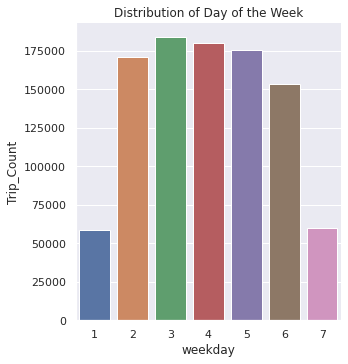

In [10]:
plt1= sns.catplot(x="weekday", y="Trip_Count", 
            kind="bar", 
            data=fre_day_week)

plt1.set(title="Distribution of Day of the Week")

The graph above displays the distribution of the trips in day of the week. 1 represents Monday and 7 represents Sunday. The bar graph indicates that we have more customers use our bikes from Tuesday to Saturday. 

#### What is the frequency of trips in the sense of hour of the day?

In [11]:
! bq query --use_legacy_sql=FALSE --format=csv  'select extract(hour from DATETIME(start_date, "America/Los_Angeles")) as hour,count(trip_id) as Trip_Count,from `bigquery-public-data.san_francisco.bikeshare_trips` group by hour order by hour' > fre_hour.csv

Waiting on bqjob_r5411880b8a94a450_00000174d09fd2d8_1 ... (0s) Current status: DONE   


In [12]:
fre_day_hour = pd.read_csv('fre_hour.csv')

In [13]:
fre_day_hour

,hour,Trip_Count
0,0,86967
1,1,121939
2,2,80311
3,3,41826
4,4,42292
5,5,46003
6,6,41901
7,7,40761
8,8,59969
9,9,98465


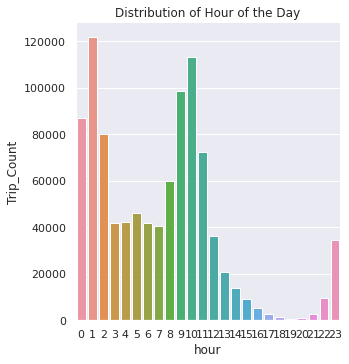

In [14]:
plt2 = sns.catplot(x="hour", y="Trip_Count", 
            kind="bar", 
            data=fre_day_hour)

plt2.set(title="Distribution of Hour of the Day")

The graph "Distribution of hour of the day" indicates that there might be some data error happened around the midnight. I segmented them in the database and verified some records and did UTC change on my end, however, the `extract(hour from DATETIME(start_date,"America/Los_Angeles"))` seems to transfer UTC to LA time correctly. I would communicate this back to DBA and figure out what happened. In general, I was tended to find out the pattern of distribution of trips in each hour and identify the "rush hour" in SF. 

Therefore, I am going to use the original UTC and build the distribution graph as follow.

In [5]:
! bq query --use_legacy_sql=FALSE --format=csv  'select extract(hour from start_date) as hour,count(trip_id) as Trip_Count,from `bigquery-public-data.san_francisco.bikeshare_trips` group by hour order by hour' > fre_hour2.csv

Waiting on bqjob_r40220a91e625b702_00000174d1c2584e_1 ... (0s) Current status: DONE   


In [6]:
fre_day_hour2 = pd.read_csv('fre_hour2.csv')

In [7]:
fre_day_hour2

,hour,Trip_Count
0,0,2929
1,1,1611
2,2,877
3,3,605
4,4,1398
5,5,5098
6,6,20519
7,7,67531
8,8,132464
9,9,96118


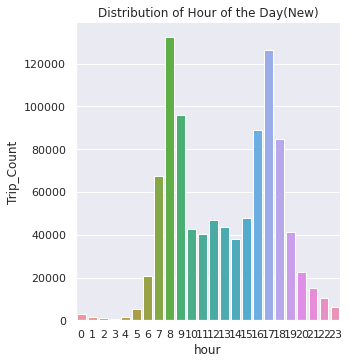

In [9]:
plt2_new = sns.catplot(x="hour", y="Trip_Count", 
            kind="bar", 
            data=fre_day_hour2)

plt2_new.set(title="Distribution of Hour of the Day(New)")

Without converting the UTC to local time, the graph makes more sense. This graph indicates that the morning rush hour happens from 7 to 9 am, and the afternoon rush hour happens between 4 pm to 6 pm. The traffic gradually dies down after 8 pm. Therefore, we have more confidence to define the commuter trip as trips happened between 7 to 9 am and 4 pm to 6 pm between Monday and Friday. 

#### How many commuter trips in the database?

In [15]:
! bq query --use_legacy_sql=FALSE --format=csv  'select count(*) from (select *,Case when ((extract(hour from DATETIME(start_date,"America/Los_Angeles")) between 7 and 9) or (extract(hour from   DATETIME(start_date,"America/Los_Angeles")) between 16 and 18))and extract(dayofweek from  DATETIME(start_date,"America/Los_Angeles")) between 1 and 5 Then "Commuter Trip" Else "Non Commuter Trip" end as CommuterTrip from `bigquery-public-data.san_francisco.bikeshare_trips` ) where CommuterTrip = "Commuter Trip"' > comm.csv

Waiting on bqjob_r66b4616edb928d09_00000174d09fed17_1 ... (0s) Current status: DONE   


In [16]:
commuter = pd.read_csv('comm.csv')

In [17]:
commuter

,f0_
0,154868


Due to the data error we might have in the database, here we defined rush hour as "trips happened between 7 am - 10 am and 4 pm - 6 pm from Monday to Friday". Out of 983648 trips we have over 3 years, 154868 (15.7%) of them are commuter trip. 


#### How many users were customers when they were doing commuter trips?

In [18]:
! bq query --use_legacy_sql=FALSE --format=csv  'select subscriber_type, count(*) from (select *,Case when ((extract(hour from DATETIME(start_date, "America/Los_Angeles")) between 7 and 9) or (extract(hour from DATETIME(start_date, "America/Los_Angeles")) between 16 and 18)) and extract(dayofweek from DATETIME(start_date, "America/Los_Angeles")) between 1 and 5 Then "Commuter Trip" Else "Non Commuter Trip" end as CommuterTrip from `bigquery-public-data.san_francisco.bikeshare_trips` ) where CommuterTrip = "Commuter Trip" group by subscriber_type' > customer.csv

Waiting on bqjob_r4a0cc7415d481118_00000174d0a000f5_1 ... (0s) Current status: DONE   


In [19]:
customer = pd.read_csv('customer.csv')

In [20]:
customer

,subscriber_type,f0_
0,Subscriber,130266
1,Customer,24602


Among people who used our product during rush hour, 130266 (84.1%) of them are subscribers, while 24602 (15.9%) of them are customers (who paided by single ride). We can try to do advertising or marketing to these customers, and introduce them the subscription plan and encourage them to use our products more. In order to target these customers, we are going to find the top start and end stations that these customers use, and set up billboards around the bike stations. 

#### What are the top 5 start and end stations that customers were doing commuter trips?

In [21]:
! bq query --use_legacy_sql=FALSE --format=csv  'select start_station_name , count(trip_id ) as counts from `swift-setup-287702.Project1.commuter_customer` group by start_station_name order by counts desc limit 5' > customer_start.csv

Waiting on bqjob_r44084597287eee53_00000174d0a01156_1 ... (0s) Current status: DONE   


In [22]:
! bq query --use_legacy_sql=FALSE --format=csv  'select end_station_name , count(trip_id ) as counts from `swift-setup-287702.Project1.commuter_customer` group by end_station_name  order by counts desc limit 5' > customer_end.csv

Waiting on bqjob_r55083de015882c31_00000174d0a0197e_1 ... (0s) Current status: DONE   


In [23]:
customer_start_stations = pd.read_csv('customer_start.csv')

In [24]:
customer_end_stations = pd.read_csv('customer_end.csv')

In [25]:
customer_start_stations

,start_station_name,counts
0,Embarcadero at Sansome,13934
1,Harry Bridges Plaza (Ferry Building),12441
2,Market at 4th,5952
3,Powell Street BART,5214
4,Embarcadero at Vallejo,4945


In [26]:
customer_end_stations

,end_station_name,counts
0,Embarcadero at Sansome,17921
1,Harry Bridges Plaza (Ferry Building),11200
2,Market at 4th,5759
3,Powell Street BART,5225
4,Embarcadero at Vallejo,5212


As we can see above, top start and end stations are the same for these customers who took the commuter trips. We can talk to the marketing or the design department and advocate the subscription plan. After putting the banner for 3 months or a month, we can measure how many new subscribers added in the system. 

#### What are the 5 most popular trips that you would call "commuter trips"?

In [67]:
! bq query --use_legacy_sql=FALSE --format=csv 'select concat(start_station_id,"-",end_station_id), start_station_name , end_station_name ,count(trip_id ) as count from(   select *,Case  when ((extract(hour from DATETIME(start_date, "America/Los_Angeles")) between 7 and 9) or (extract(hour from DATETIME(start_date, "America/Los_Angeles")) between 16 and 18)) and extract(dayofweek from DATETIME(start_date, "America/Los_Angeles")) between 1 and 5 Then "Commuter Trip" Else "Non Commuter Trip" end as CommuterTrip from `bigquery-public-data.san_francisco.bikeshare_trips` ) group by concat(start_station_id,"-",end_station_id), start_station_name , end_station_name order by count desc limit 5' > top5_trips.csv

Waiting on bqjob_r3da2c9427eaf0d3f_00000174d0aeddbc_1 ... (0s) Current status: DONE   


In [68]:
top5_commuter_trips = pd.read_csv('top5_trips.csv')

In [69]:
top5_commuter_trips

,f0_,start_station_name,end_station_name,count
0,50-60,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,69-65,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,61-50,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,50-61,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,60-74,Embarcadero at Sansome,Steuart at Market,6874


#### What are the top 10 stations which zero bike available happened the most times there?

In [70]:
! bq query --use_legacy_sql=FALSE --format=csv 'select status.station_id, name, count(status.bikes_available ) as counts, station.longitude , station.latitude , station.landmark from `bigquery-public-data.san_francisco.bikeshare_status` as status left join `bigquery-public-data.san_francisco.bikeshare_stations` as station on status.station_id = station.station_id where bikes_available = 0  group by station_id, name, station.longitude , station.latitude , station.landmark  order by counts desc limit 10' > zero_bike.csv

Waiting on bqjob_r75f1f5646f7b112d_00000174d0aeffea_1 ... (0s) Current status: DONE   


In [71]:
top10_zero_bike = pd.read_csv('zero_bike.csv')

In [72]:
top10_zero_bike

,station_id,name,counts,longitude,latitude,landmark
0,62,2nd at Folsom,44844,-122.396236,37.785299,San Francisco
1,45,Commercial at Montgomery,44728,-122.402923,37.794231,San Francisco
2,48,Embarcadero at Vallejo,35903,-122.398525,37.799953,San Francisco
3,60,Embarcadero at Sansome,32980,-122.403234,37.804770,San Francisco
4,41,Clay at Battery,32505,-122.399970,37.795001,San Francisco
5,70,San Francisco Caltrain (Townsend at 4th),32027,-122.395260,37.776617,San Francisco
6,73,Grant Avenue at Columbus Avenue,31733,-122.405942,37.797900,San Francisco
7,76,Market at 4th,30800,-122.404966,37.786305,San Francisco
8,63,Howard at 2nd,27938,-122.398108,37.786978,San Francisco
9,82,Broadway St at Battery St,25496,-122.400862,37.798541,San Francisco


Now, we find the top 10 stations which have the most of zero bike status happened in the system. They are all gathered in Sf downtown area. We can do more investigation and try to put more bikes to these locations or have access of the customer database, pop notifications on their apps to offer them discount ride or free ride to these locations. 

Overall, this report defined the commuter trips, provide 2 suggestions as a data analyst in the team: 
1. recommended set up banner or billboards at certain stations to advertise our subscription plan, in order to encourage more customers to use our products. 
2. pinpointed 10 stations which have zero bike status showing up most of times in the system, we will suggest adding more bikes or advertise free rides or discount rides to these locations. 